# Graph Hands-on w/ Networkx - BDSC April 2024

In [1]:
import itertools
from typing import Optional, Dict, List

import matplotlib.pyplot as plt
import networkx as nx

In [2]:
def create_cliques(nodes: List[str]):
    return list(itertools.combinations(nodes, 2))

In [3]:
NODE_SIZE = 2_000

## Graph 1

In [4]:
g1_edges = list(
    itertools.chain(
        itertools.product('A', 'BCDE'),
        itertools.product('Z', 'YXVW')
    )
)
g1_edges.extend([('A', 'F'), ('F', 'Z')])

In [5]:
g1_edges

[('A', 'B'),
 ('A', 'C'),
 ('A', 'D'),
 ('A', 'E'),
 ('Z', 'Y'),
 ('Z', 'X'),
 ('Z', 'V'),
 ('Z', 'W'),
 ('A', 'F'),
 ('F', 'Z')]

In [6]:
g1 = nx.Graph(g1_edges)

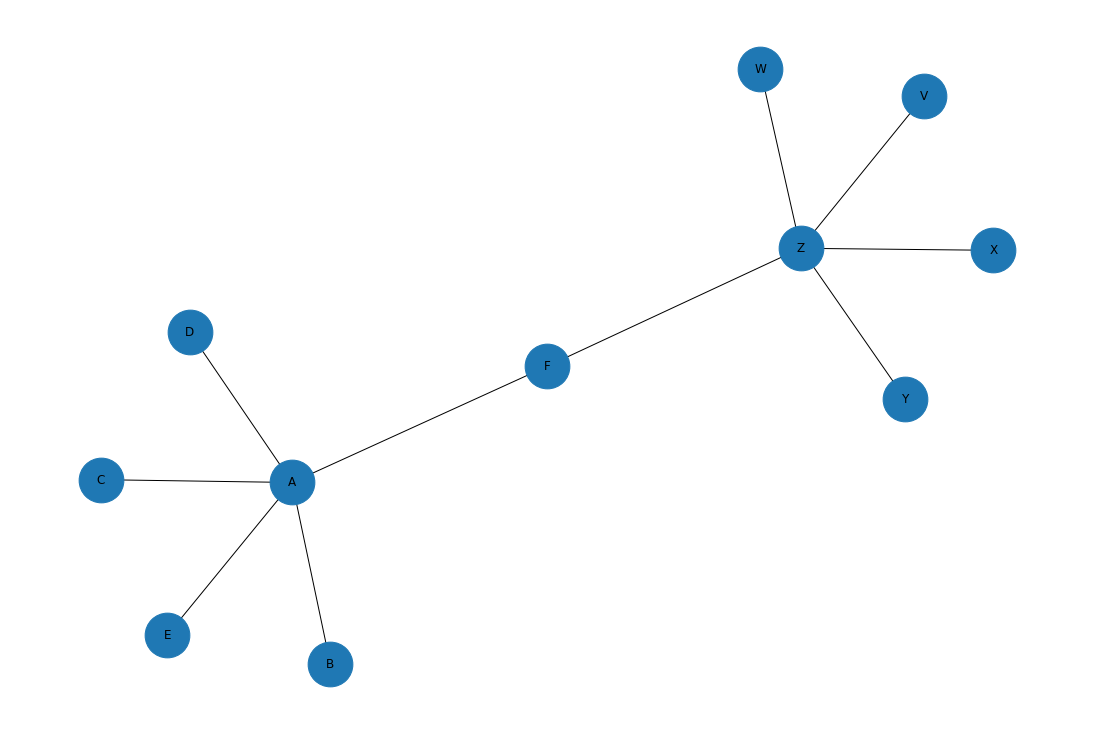

In [7]:
plt.figure(figsize=(15, 10))
nx.draw(g1, pos=nx.spring_layout(g1), with_labels=True, node_size=NODE_SIZE)

#### Degree Centrality

In [8]:
nx.degree_centrality(g1)

{'A': 0.5,
 'B': 0.1,
 'C': 0.1,
 'D': 0.1,
 'E': 0.1,
 'Z': 0.5,
 'Y': 0.1,
 'X': 0.1,
 'V': 0.1,
 'W': 0.1,
 'F': 0.2}

#### Betweenness Centrality

In [9]:
nx.betweenness_centrality(g1)

{'A': 0.6666666666666667,
 'B': 0.0,
 'C': 0.0,
 'D': 0.0,
 'E': 0.0,
 'Z': 0.6666666666666667,
 'Y': 0.0,
 'X': 0.0,
 'V': 0.0,
 'W': 0.0,
 'F': 0.5555555555555556}

#### Community Detection - Louvain Algorithm

In [10]:
nx.community.louvain_communities(g1)

[{'A', 'B', 'C', 'D', 'E', 'F'}, {'V', 'W', 'X', 'Y', 'Z'}]

## Graph 2

In [11]:
g2_edges = list(itertools.chain(
    create_cliques('ABCDE'),
    create_cliques('FGHIJ'),
    create_cliques('KLMNO'),
    create_cliques('PQRST')
))
g2_edges.extend([('Z', 'A'), ('Z', 'F'), ('Z', 'K'), ('Z', 'P')])

In [12]:
g2 = nx.Graph()
g2.add_edges_from(g2_edges)

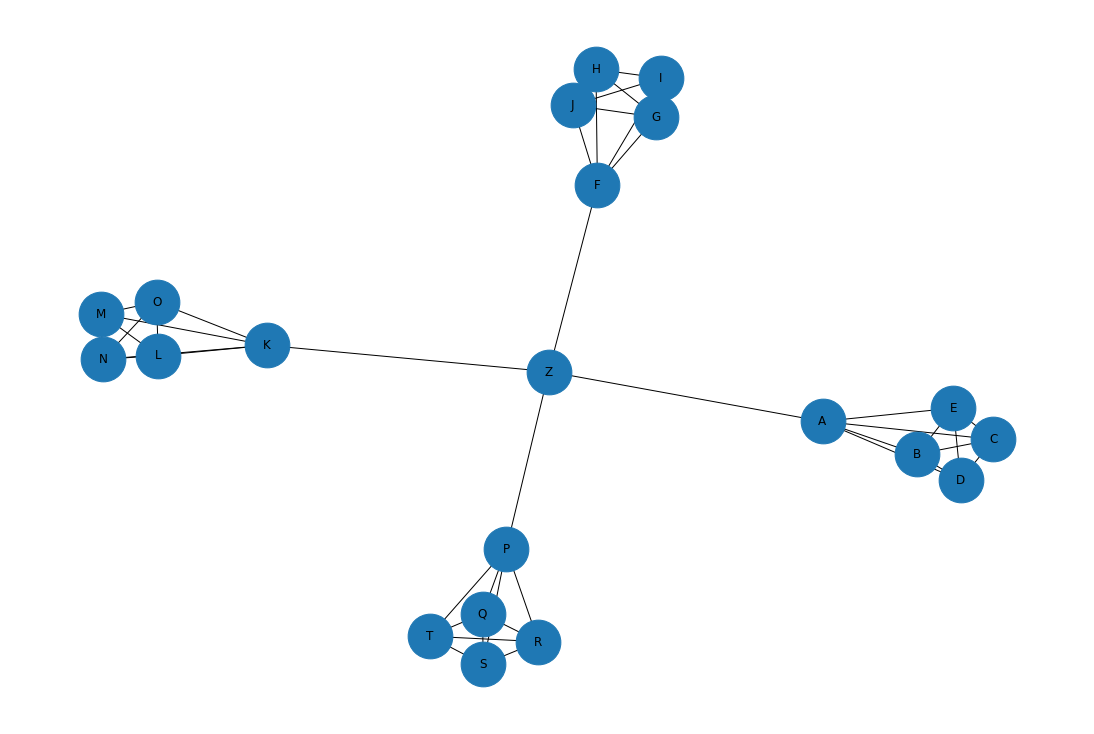

In [13]:
plt.figure(figsize=(15, 10))
nx.draw(g2, pos=nx.spring_layout(g2), node_size=NODE_SIZE, with_labels=True)

#### Ego Graph

In [14]:
ego_1 = nx.ego_graph(g2, 'F', radius=1)

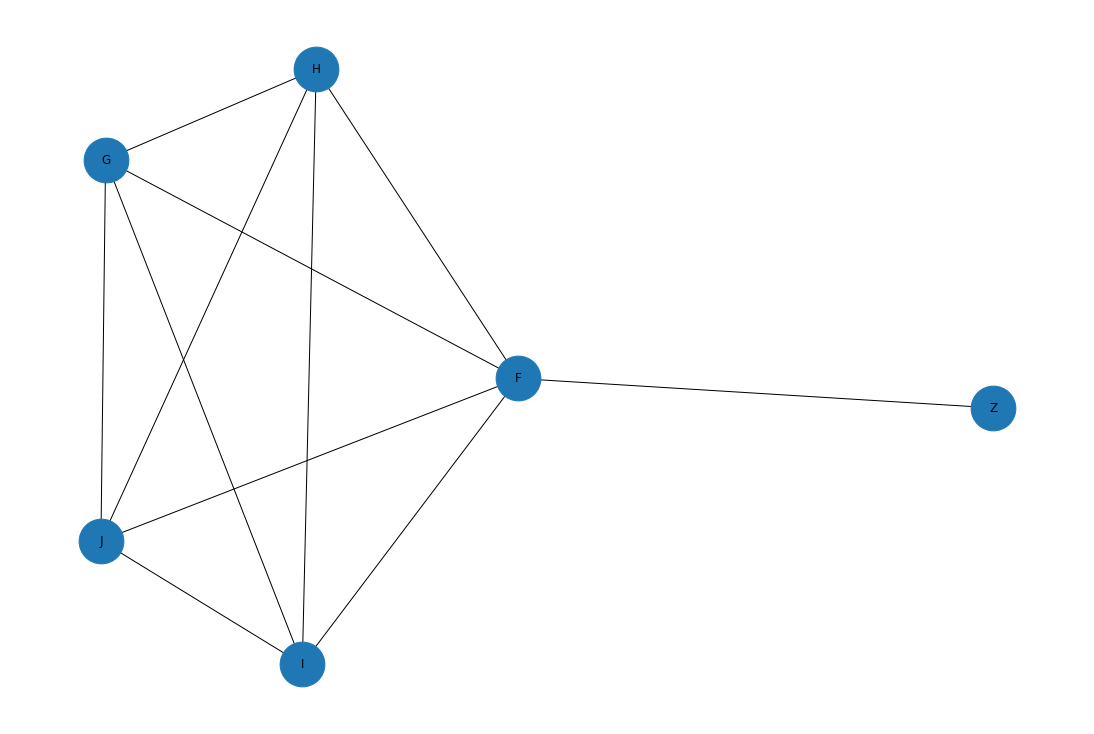

In [15]:
plt.figure(figsize=(15, 10))
nx.draw(ego_1, pos=nx.spring_layout(ego_1), node_size=NODE_SIZE, with_labels=True)

#### Connected Components

In [16]:
list(nx.connected_components(g2))

[{'A',
  'B',
  'C',
  'D',
  'E',
  'F',
  'G',
  'H',
  'I',
  'J',
  'K',
  'L',
  'M',
  'N',
  'O',
  'P',
  'Q',
  'R',
  'S',
  'T',
  'Z'}]

#### Cliques

In [17]:
list(nx.find_cliques(g2))

[['E', 'B', 'C', 'D', 'A'],
 ['F', 'J', 'I', 'G', 'H'],
 ['F', 'Z'],
 ['K', 'M', 'N', 'O', 'L'],
 ['K', 'Z'],
 ['T', 'R', 'Q', 'P', 'S'],
 ['P', 'Z'],
 ['A', 'Z']]

#### Node Removal

In [18]:
g2.remove_node('Z')

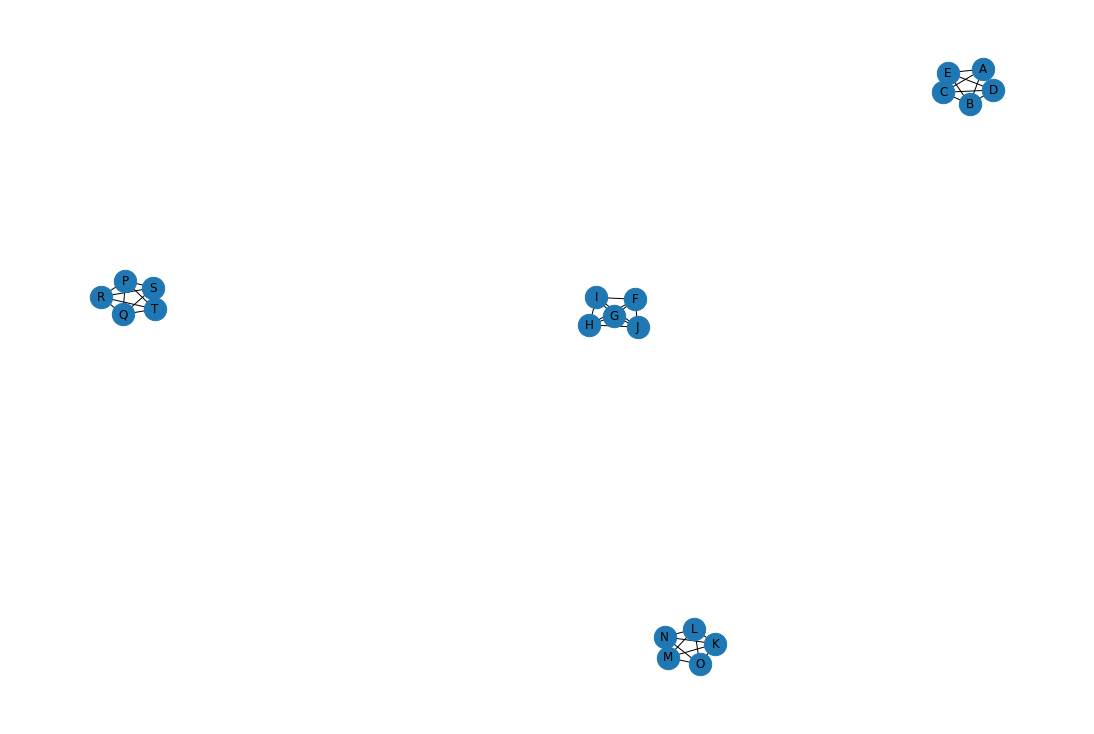

In [19]:
plt.figure(figsize=(15, 10))
nx.draw(g2, pos=nx.spring_layout(g2), node_size=500, with_labels=True)

In [20]:
list(nx.connected_components(g2))

[{'A', 'B', 'C', 'D', 'E'},
 {'F', 'G', 'H', 'I', 'J'},
 {'K', 'L', 'M', 'N', 'O'},
 {'P', 'Q', 'R', 'S', 'T'}]

## Graph 3

In [21]:
g3_edges = [
    ('A', 'B'),
    ('B', 'Z'),
    
    ('A', 'C'),
    ('C', 'D'),
    ('D', 'E'),
    ('E', 'Z'),
    
    ('A', 'F'),
    ('F', 'G'),
    ('G', 'H'),
    ('H', 'I'),
    ('I', 'Z'),
]

In [22]:
g3 = nx.DiGraph(g3_edges)

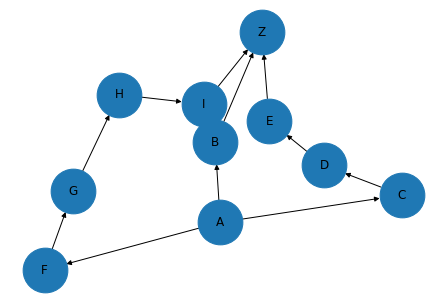

In [23]:
nx.draw(g3, with_labels=True, node_size=NODE_SIZE)

#### Shortest Path

In [24]:
nx.shortest_path(g3, 'A', 'Z')

['A', 'B', 'Z']

## Graph 4

In [25]:
g4_edges = [
    ('A', 'B', 100),
    ('B', 'Z', 100),
    
    ('A', 'C', 10),
    ('C', 'D', 20),
    ('D', 'E', 30),
    ('E', 'Z', 40),
    
    ('A', 'F', 1),
    ('F', 'G', 1),
    ('G', 'H', 1),
    ('H', 'I', 1),
    ('I', 'Z', 1),
]
g4 = nx.DiGraph()
g4.add_weighted_edges_from(g4_edges)

In [26]:
nx.shortest_path(g4, 'A', 'Z')

['A', 'B', 'Z']

In [27]:
nx.shortest_path(g4, 'A', 'Z', weight='weight')

['A', 'F', 'G', 'H', 'I', 'Z']

## Directed Acyclic Graph (DAG)

In [28]:
dependency_edges = [
    ('A', 'B'), 
    ('B', 'C'),
    ('C', 'F'),
    
    ('D', 'E'),
    ('E', 'F'),
    
    ('F', 'G'),
    ('H', 'G'),
    
    ('G', 'J'),
    ('I', 'J'),
    
    ('J', 'K')
]
dependency_graph = nx.DiGraph(dependency_edges)

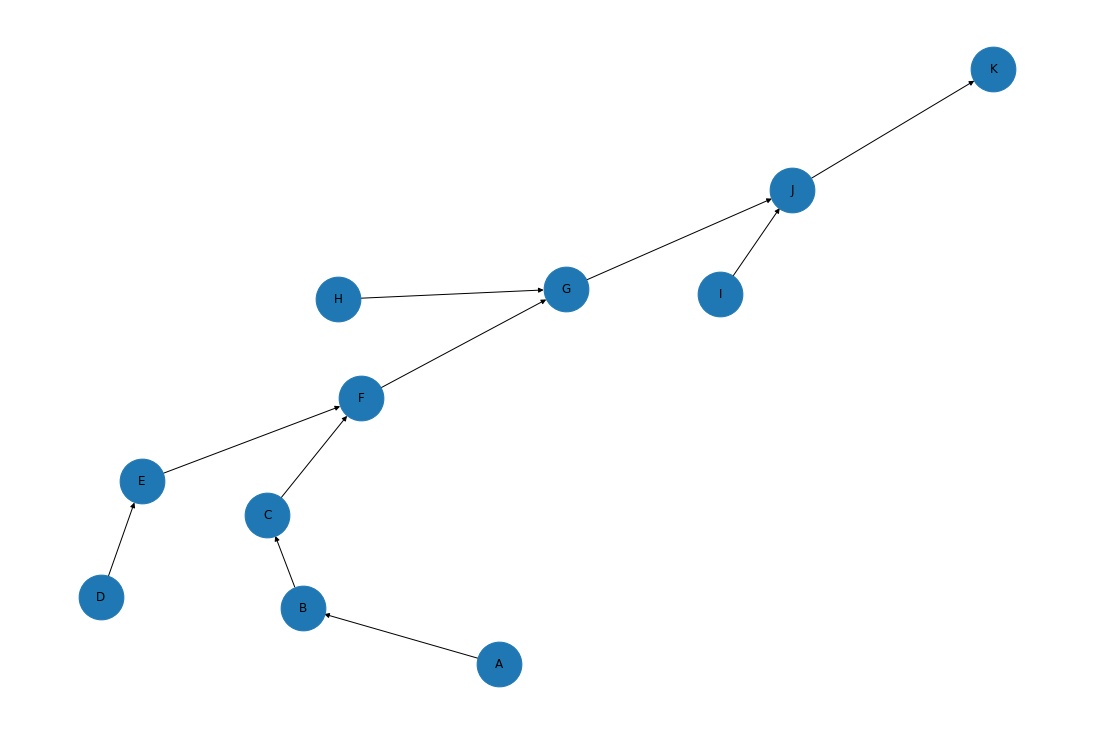

In [29]:
plt.figure(figsize=(15, 10))
nx.draw(dependency_graph, pos=nx.spring_layout(dependency_graph,  seed=7), with_labels=True, node_size=NODE_SIZE)

#### Topological Sort

In [30]:
list(nx.topological_sort(dependency_graph))

['A', 'D', 'H', 'I', 'B', 'E', 'C', 'F', 'G', 'J', 'K']

## Advanced Visualizations

In [31]:
g_viz_edges = []

for i in 'ABCDEF':
    g_viz_edges.append((i, 'Z'))
    for j in '1234':
        g_viz_edges.append((i, i + j))
        

In [32]:
g_viz = nx.Graph(g_viz_edges)

#### A Very Boring Visualization

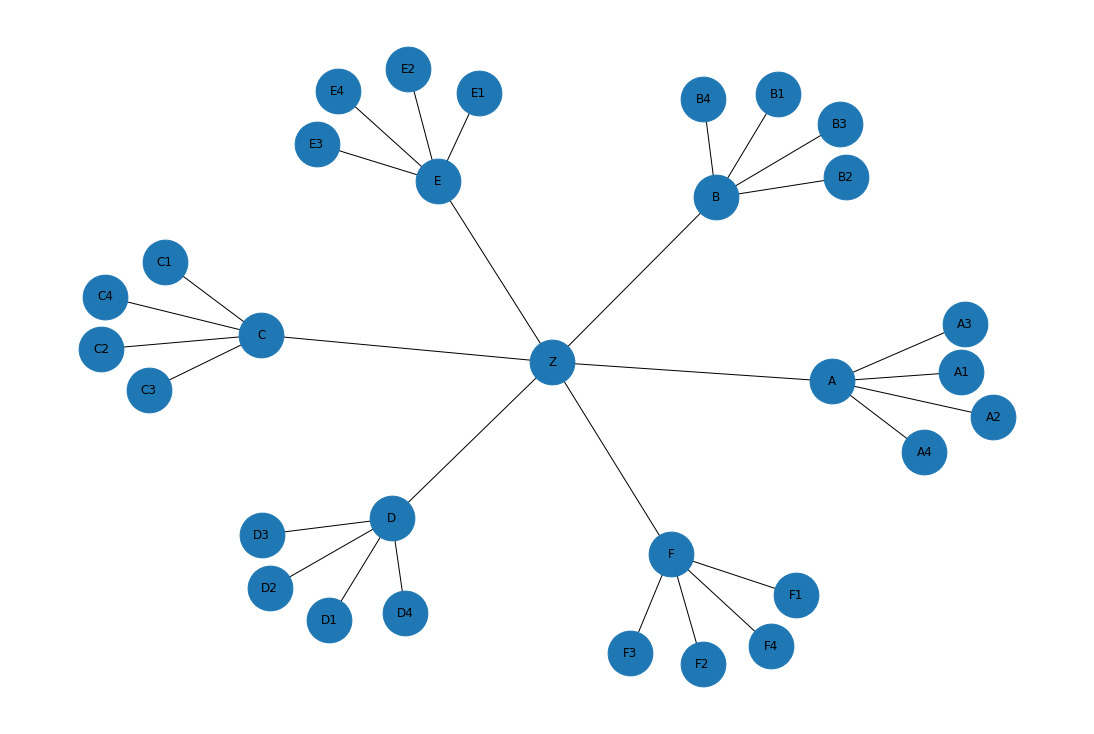

In [33]:
plt.figure(figsize=(15, 10))
nx.draw(g_viz, with_labels=True, node_size=NODE_SIZE)

In [34]:
g_viz.nodes

NodeView(('A', 'Z', 'A1', 'A2', 'A3', 'A4', 'B', 'B1', 'B2', 'B3', 'B4', 'C', 'C1', 'C2', 'C3', 'C4', 'D', 'D1', 'D2', 'D3', 'D4', 'E', 'E1', 'E2', 'E3', 'E4', 'F', 'F1', 'F2', 'F3', 'F4'))

In [35]:
g_viz_communities = nx.community.louvain_communities(g_viz)
g_viz_communities

[{'A', 'A1', 'A2', 'A3', 'A4'},
 {'B', 'B1', 'B2', 'B3', 'B4', 'Z'},
 {'C', 'C1', 'C2', 'C3', 'C4'},
 {'D', 'D1', 'D2', 'D3', 'D4'},
 {'E', 'E1', 'E2', 'E3', 'E4'},
 {'F', 'F1', 'F2', 'F3', 'F4'}]

In [36]:
colors = ('red', 'blue', 'green', 'lightgrey', 'orange', 'cyan')
color_map = {}
for color, community in zip(colors, g_viz_communities):
    color_map.update(
        dict.fromkeys(community, color)
    )

In [37]:
color_map

{'A3': 'red',
 'A2': 'red',
 'A1': 'red',
 'A': 'red',
 'A4': 'red',
 'B3': 'blue',
 'Z': 'blue',
 'B': 'blue',
 'B2': 'blue',
 'B4': 'blue',
 'B1': 'blue',
 'C2': 'green',
 'C1': 'green',
 'C': 'green',
 'C3': 'green',
 'C4': 'green',
 'D3': 'lightgrey',
 'D4': 'lightgrey',
 'D1': 'lightgrey',
 'D': 'lightgrey',
 'D2': 'lightgrey',
 'E': 'orange',
 'E4': 'orange',
 'E1': 'orange',
 'E3': 'orange',
 'E2': 'orange',
 'F': 'cyan',
 'F2': 'cyan',
 'F3': 'cyan',
 'F1': 'cyan',
 'F4': 'cyan'}

In [38]:
node_colors = [color_map[node] for node in g_viz.nodes]

In [39]:
node_colors

['red',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'green',
 'green',
 'green',
 'green',
 'green',
 'lightgrey',
 'lightgrey',
 'lightgrey',
 'lightgrey',
 'lightgrey',
 'orange',
 'orange',
 'orange',
 'orange',
 'orange',
 'cyan',
 'cyan',
 'cyan',
 'cyan',
 'cyan']

In [40]:
g_viz_betweenness = nx.betweenness_centrality(g_viz, normalized=False)
g_viz_betweenness

{'A': 110.0,
 'Z': 375.0,
 'A1': 0.0,
 'A2': 0.0,
 'A3': 0.0,
 'A4': 0.0,
 'B': 110.0,
 'B1': 0.0,
 'B2': 0.0,
 'B3': 0.0,
 'B4': 0.0,
 'C': 110.0,
 'C1': 0.0,
 'C2': 0.0,
 'C3': 0.0,
 'C4': 0.0,
 'D': 110.0,
 'D1': 0.0,
 'D2': 0.0,
 'D3': 0.0,
 'D4': 0.0,
 'E': 110.0,
 'E1': 0.0,
 'E2': 0.0,
 'E3': 0.0,
 'E4': 0.0,
 'F': 110.0,
 'F1': 0.0,
 'F2': 0.0,
 'F3': 0.0,
 'F4': 0.0}

In [41]:
size_map = {node: max(g_viz_betweenness[node] * 30, 1000) for node in g_viz.nodes}
size_map

{'A': 3300.0,
 'Z': 11250.0,
 'A1': 1000,
 'A2': 1000,
 'A3': 1000,
 'A4': 1000,
 'B': 3300.0,
 'B1': 1000,
 'B2': 1000,
 'B3': 1000,
 'B4': 1000,
 'C': 3300.0,
 'C1': 1000,
 'C2': 1000,
 'C3': 1000,
 'C4': 1000,
 'D': 3300.0,
 'D1': 1000,
 'D2': 1000,
 'D3': 1000,
 'D4': 1000,
 'E': 3300.0,
 'E1': 1000,
 'E2': 1000,
 'E3': 1000,
 'E4': 1000,
 'F': 3300.0,
 'F1': 1000,
 'F2': 1000,
 'F3': 1000,
 'F4': 1000}

In [42]:
node_sizes = [size_map[node] for node in g_viz.nodes]
node_sizes

[3300.0,
 11250.0,
 1000,
 1000,
 1000,
 1000,
 3300.0,
 1000,
 1000,
 1000,
 1000,
 3300.0,
 1000,
 1000,
 1000,
 1000,
 3300.0,
 1000,
 1000,
 1000,
 1000,
 3300.0,
 1000,
 1000,
 1000,
 1000,
 3300.0,
 1000,
 1000,
 1000,
 1000]

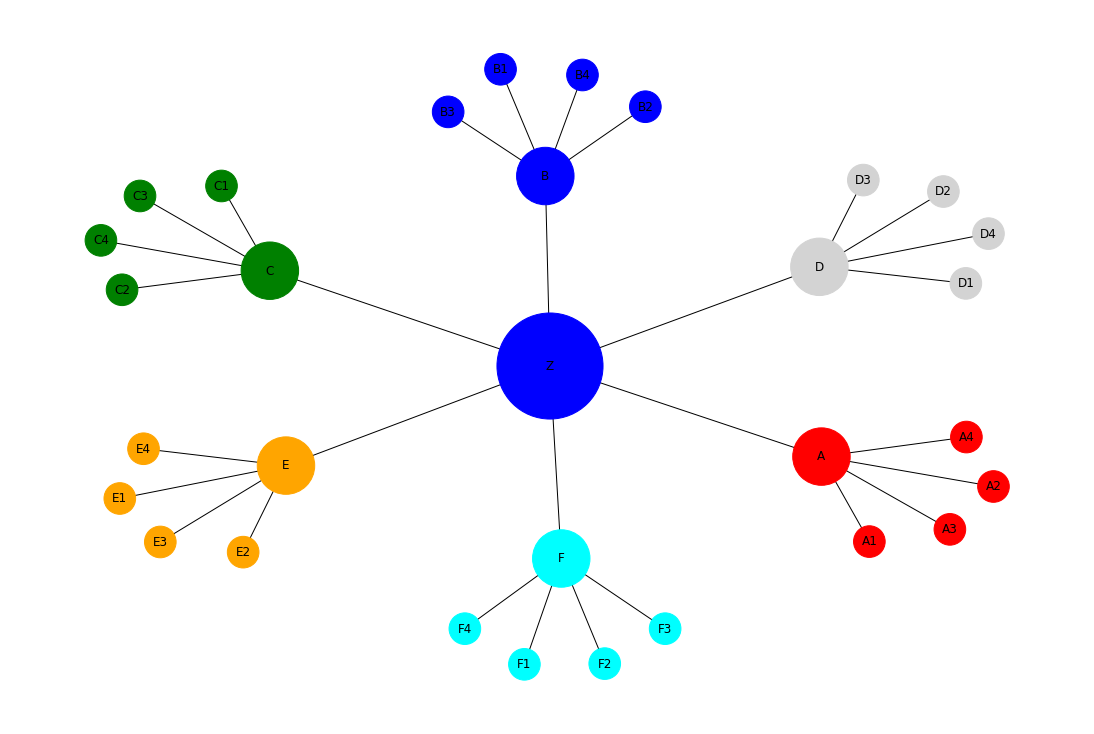

In [43]:
plt.figure(figsize=(15, 10))
nx.draw(g_viz, pos=nx.spring_layout(g_viz, seed=1), node_color=node_colors, node_size=node_sizes, with_labels=True)

# End